# Figure 1 - Study overview and genome-wide allele frequency changes

In [1]:
# load external dependencies
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as PathEffects
%matplotlib inline

import glob, os, re
import numpy as np
import pandas as pd # (*) Pandas for data manipulation
import math

import json, matplotlib
s = json.load( open("matplotlibrc.json") )
matplotlib.rcParams.update(s)

# load internal dependencies
import colors,plot,stats,utils
from utils import sgd_length
from config import *
from paths import *

## Data import

### Entropy

In [2]:
files = glob.glob(dir_data+"seq/entropy/*.entropy.txt")

entropy_df = pd.DataFrame()
for pp in files:
    # read into pandas dataframe
    frame = pd.read_csv(pp, sep="\t", names=['time','entropy'])

    f = re.split(r'[.-]+', os.path.basename(pp))

    frame['sample'] = f[0]
    frame['background'] = f[0].split('_')[0]
    frame['cross'] = f[0].split('_')[1]
    frame['cross_rep'] = f[0].split('_')[2]
    frame['selection'] = f[0].split('_')[3]
    frame['selection_rep'] = f[0].split('_')[4]
    
    entropy_df = entropy_df.append(frame, ignore_index=True)

entropy_df['entropy'] /= 52466
# entropy_df['entropy'] = 1+entropy_df['entropy']

entropy_df = pd.pivot_table(entropy_df, 
                            values='entropy', 
                            index=['time'], 
                            columns=['selection','sample'])

entropy_df.head()

selection               HU                                                     \
sample    WAxNA_F12_1_HU_1 WAxNA_F12_1_HU_2 WAxNA_F12_1_HU_3 WAxNA_F12_2_HU_1   
time                                                                            
0                      NaN              NaN              NaN              NaN   
2                 0.000007         0.000283         0.000435         0.001070   
4                -0.000210         0.000927         0.000408         0.001350   
8                -0.002033        -0.006285        -0.000559         0.005307   
16               -0.002748        -0.005583        -0.005104         0.009325   

selection                                                 RM                   \
sample    WAxNA_F12_2_HU_2 WAxNA_F12_2_HU_3 WAxNA_F12_1_RM_1 WAxNA_F12_1_RM_2   
time                                                                            
0                      NaN              NaN              NaN              NaN   
2                 0.001136        -0.000062         0.000087         0.000588   
4                 0.002018         0.001341        -0.002148        -0.000598   
8                 0.005319         0.005057        -0.001521        -0.005070   
16                0.008869         0.007466        -0.110868        -0.010690   

selection                                                                      \
sample    WAxNA_F12_1_RM_3 WAxNA_F12_1_RM_4 WAxNA_F12_2_RM_1 WAxNA_F12_2_RM_2   
time                                                                            
0                      NaN              NaN              NaN              NaN   
2                 0.000338         0.000401         0.001103         0.003347   
4                -0.000613        -0.000577        -0.001412         0.001772   
8                -0.009998        -0.013116        -0.028076         0.003067   
16               -0.061417        -0.096142        -0.114685         0.000132   

selection                                                 YPD  \
sample    WAxNA_F12_2_RM_3 WAxNA_F12_2_RM_4 WAxNA_F12_1_YPD_1   
time                                                            
0                      NaN              NaN          0.000000   
2                 0.001794         0.002183         -0.000819   
4                 0.001337         0.001044         -0.001168   
8                -0.003946         0.001375               NaN   
16               -0.014956        -0.002055         -0.000089   

selection                                                        
sample    WAxNA_F12_1_YPD_2 WAxNA_F12_2_YPD_1 WAxNA_F12_2_YPD_2  
time                                                             
0                  0.000024          0.000000          0.001589  
2                       NaN          0.001409               NaN  
4                       NaN         -0.000531               NaN  
8                       NaN               NaN               NaN  
16                      NaN          0.000241               NaN

In [3]:
# files = glob.glob(dir_data+"seq/filterHD-v1.0/SNVs.seg.*.filtered.jumps.txt")

# jumps_df = pd.DataFrame()
# for jj in files:
#     # read into pandas dataframe
#     frame = pd.read_csv(jj, sep=' ', index_col=None)
#     frame.rename(columns={'#sample': 'chr'}, inplace=True)
#     #
#     f = re.split(r'[.-]+', os.path.basename(jj))
#     frame['sample'] = f[2]
#     frame['time'] = f[5]
#     #
#     jumps_df = jumps_df.append(frame, ignore_index=True)

files = glob.glob(dir_data+"seq/filterHD-v1.0/SNVs.seg.*.filtered.posterior-*.txt")

freq_df = pd.DataFrame()
for pp in files:
    # read into pandas dataframe
    frame = pd.read_csv(pp, sep=r"\s+", index_col=None)
    frame.rename(columns={'#sample': 'chr_arabic'}, inplace=True)
    
    f = re.split(r'[.-]+', os.path.basename(pp))

    frame['sample'] = f[2]
    frame['background'] = f[2].split('_')[0]
    frame['cross'] = f[2].split('_')[1]
    frame['cross_rep'] = f[2].split('_')[2]
    frame['selection'] = f[2].split('_')[3]
    frame['selection_rep'] = f[2].split('_')[4]
    frame['time'] = int(f[5])
    
    freq_df = freq_df.append(frame, ignore_index=True)

freq_df = utils.chr_to_gw(freq_df)

freq_df['chr_roman'] = freq_df['chr_arabic'].apply(utils.int_to_roman)

freq_df = freq_df[~freq_df['selection'].isin(['PM-HU','PM-RM','PM'])]

freq_df = pd.pivot_table(freq_df, 
                         index=['selection','sample','time'], 
                         columns=['chr_arabic','chr_roman','pos'], 
                         values='mean')

freq_df.head()

chr_arabic                            1                                       \
chr_roman                              I                                       
pos                             2718     2731     2734     4532     5035       
selection sample           time                                                
HU        WAxNA_F12_1_HU_1 2       0.920    0.920    0.920    0.932    0.924   
                           4       0.931    0.931    0.931    0.948    0.951   
                           8       0.929    0.930    0.930    0.944    0.949   
                           16      0.956    0.957    0.957    0.969    0.960   
                           32      0.978    0.979    0.979    0.985    0.986   

chr_arabic                                                                    \
chr_roman                                                                      
pos                             5218     5237     6556     6652     6673       
selection sample           time                                                
HU        WAxNA_F12_1_HU_1 2       0.922    0.922    0.957    0.960    0.960   
                           4       0.948    0.948    0.954    0.954    0.955   
                           8       0.951    0.951    0.954    0.953    0.953   
                           16      0.956    0.956    0.965    0.967    0.968   
                           32      0.988    0.988    0.989    0.990    0.990   

chr_arabic                        ...          16                             \
chr_roman                         ...         XVI                              
pos                               ...    12047269 12047387 12047390 12047412   
selection sample           time   ...                                          
HU        WAxNA_F12_1_HU_1 2      ...       0.432    0.430    0.430    0.430   
                           4      ...       0.391    0.391    0.391    0.391   
                           8      ...       0.404    0.402    0.402    0.402   
                           16     ...       0.358    0.355    0.355    0.355   
                           32     ...       0.727    0.727    0.727    0.727   

chr_arabic                                                                    \
chr_roman                                                                      
pos                             12048203 12048272 12048287 12048293 12050111   
selection sample           time                                                
HU        WAxNA_F12_1_HU_1 2       0.440    0.440    0.441    0.441    0.437   
                           4       0.394    0.394    0.394    0.394    0.409   
                           8       0.398    0.397    0.397    0.397    0.407   
                           16      0.360    0.361    0.361    0.361    0.376   
                           32      0.722    0.722    0.722    0.722    0.717   

chr_arabic                                
chr_roman                                 
pos                             12051171  
selection sample           time           
HU        WAxNA_F12_1_HU_1 2       0.454  
                           4       0.414  
                           8       0.415  
                           16      0.382  
                           32      0.712  

[5 rows x 52466 columns]

In [ ]:
fig = plt.figure(figsize=(4, 3), dpi=300)

grid = gridspec.GridSpec(2, 1, height_ratios=[1,2])#, hspace=0.4, wspace=0.4)

gs = {}
gs['schematic'] = gridspec.GridSpecFromSubplotSpec(1, 3, width_ratios=[1,1,2], subplot_spec=grid[0], hspace=0.5)
gs['freq'] = gridspec.GridSpecFromSubplotSpec(2, 2, width_ratios=[1,3], subplot_spec=grid[1], hspace=0.1)

### top panel ###
ax1 = plt.subplot(gs['schematic'][0])

ax1.text(-0.15, 1.25,  chr(ord('A')), transform=ax1.transAxes,
         fontsize=12, fontweight='bold', va='top', ha='right')

# ax1 = plt.subplot(gs['schematic'][1])

# x  = np.linspace(-5,5,100)
# y  = mlab.normpdf(x,0,1)

# ax1.plot(x, y, lw=1)

# ax1 = plt.subplot(gs['schematic'][2], projection='3d')

ax1.axis('off')
ax1.patch.set_visible(False)

# y   = np.linspace(-5,5,100)
# x1  = np.ones(y.size)
# x2  = np.ones(y.size)*32
# # y3  = np.ones(x.size)*3
# mean = 0
# variance = 1
# sigma = math.sqrt(variance)
# z1  = mlab.normpdf(y,0,1)
# z2  = mlab.normpdf(y,0.5,0.5) + mlab.normpdf(y,3,0.2)

# ax1.plot(x1, y, z1, color='r', lw=.5)
# ax1.plot(x2, y, z2, color='g', lw=.5)
# # ax.plot(x, y3, z, color='b')

# # draw vertical line from (70,100) to (70, 250)

# dates       = [0, 1, 2, 3, 4]
# highs       = [0, 0, 0, 0, 0]
# lows        = [1, 1, 1, 1, 1]
# upperLimits = [0, 0, 0, 0, 0]
# lowerLimits = [1, 1, 1, 1, 1]

# zaxisvalues0= [0, 0, 0, 0, 0]
# zaxisvalues1= [1, 1, 1, 1, 1]
# zaxisvalues2= [2, 2, 2, 2, 2]

# ax1.plot(dates, zaxisvalues1, lowerLimits, color = 'b', lw=1)
# ax1.plot(dates, zaxisvalues2, upperLimits, color = 'r', lw=1)

# ax1.view_init(elev=10., azim=135)

# # Get rid of the panes                          
# ax1.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
# ax1.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
# ax1.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 

# # Get rid of the ticks                          
# # ax1.set_xticks([])                               
# # ax1.set_yticks([])                               
# # ax1.set_zticks([])

# for i,j,k,h in zip(dates,zaxisvalues0,lows,highs):
#     ax1.plot([i,i],[j,j],[k,h], color = 'k', ls=':', lw=.5)

# # ax.add_collection3d(pl.fill_between(x, 0.95*z, 1.05*z, color='r', alpha=0.3), zs=1, zdir='y')
# # ax.add_collection3d(pl.fill_between(x, 0.90*z, 1.10*z, color='g', alpha=0.3), zs=2, zdir='y')
# # ax.add_collection3d(pl.fill_between(x, 0.85*z, 1.15*z, color='b', alpha=0.3), zs=3, zdir='y')

# ax1.invert_xaxis()

# ax1.set_xlabel('time')
# ax1.set_zlabel('frequency')

### bottom panels ###

axes = {}

for env in ['HU','RM']:
    if env=='HU':
        axes[env] = plt.subplot(gs['freq'][0,0])
        axes[env].text(-0.05, 1.25,  chr(ord('B')), transform=axes[env].transAxes,
                       fontsize=12, fontweight='bold', va='top', ha='right')
    elif env=='RM':
        axes[env] = plt.subplot(gs['freq'][1,0], sharex=axes['HU'])
        
    ax = axes[env]
    
    utils.simple_axes(ax)
    
    entropy_df[[env,'YPD']].plot(ax=ax, 
                                color=[dict_environment['color'][x] for x in entropy_df[[env,'YPD']].columns.get_level_values('selection')],
                                linewidth=1.25, 
                                marker='o', markersize=3, mec='none',
                                legend=False,
                                path_effects=[PathEffects.withStroke(linewidth=1.75, foreground='k')])

#     ax.set_xscale('log',basex=2)
    ax.set_ylim((-0.25, 0))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=2))
    
    ax.set_ylabel('Entropy')
    ax.set_xlabel('Time (days)')
    
    ax1.tick_params(axis='both', direction='out')
    ax.set_xticks(entropy_df.index)#range(len(entropy_df.index)))
    ax.set_xticklabels(entropy_df.index)
    
# labels = entropy_df.columns.get_level_values('environment').unique()
    
#     leg = ax.legend(frameon=False, ncol=1,
#                     loc='lower left', borderaxespad=0.,
#                     handlelength=0.75, prop={'size':4})

# ax2.tick_params(axis='both', which='major', size=0, labelsize=6)
# ax2.tick_params(axis='both', which='minor', size=0, labelsize=4)

### ###
axes[(1,0)] = plt.subplot(gs['freq'][0,1])
axes[(1,1)] = plt.subplot(gs['freq'][1,1], sharex=axes[(1,0)])
axes[(1,0)].text(-0.05, 1.25,  chr(ord('C')), transform=axes[(1,0)].transAxes,
                 fontsize=12, fontweight='bold', va='top', ha='right')
groups = freq_df.groupby(level=['selection','sample'], sort=False)

for ii, ((e,p), sdf) in enumerate(groups):
        
    ax3 = axes[(1,ii)]

    sdf.ix[e,p].plot(ax=ax3, lw=0.5, legend=False)

#     utils.simple_axes(ax2)
    
    ax3.set_ylim((-.1, 1.1))
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=2))
    
    xstart, xend, xlabels = plot.set_custom_labels(group.index, 2)

    # labels
    if ax3.is_last_row():
        ax3.set_xticks(xlabels.values(), minor=False)
        ax3.set_xticklabels(xlabels.keys(), minor=False)
    # grid
    xgrid=[xst+1. for xst in list(set(xstart.values()))]
    [ax3.axvline(x, lw=0.5, ls="-", color="gray") for x in xgrid]
    
#     for s,e in zip(sgd_length.chr_start, sgd_length.chr_end):
#     for chrom, g in sgd_length.groupby('chr_arabic'):
#         if chrom % 2 == 1:
#             print chrom, chrom % 2
#             ax2.axvspan(g.chr_start.squeeze(), g.chr_end.squeeze(), color='0.9', lw=0) 
    
    ax3.set_title(sample.replace('_',' '), fontsize=6, loc='center')
    ax3.set_ylabel('Allele frequency')
    
ax3.set_xlabel('Chromosome')

leg = ax3.legend(bbox_to_anchor=(1.05, 0.5), frameon=False, prop={'size':4},
                 loc='upper right', borderaxespad=0.,
                 handlelength=0.75, title='Time', ncol=5)

ax3.tick_params(axis='x', which='major', size=0, labelsize=6)
ax3.tick_params(axis='x', which='minor', size=0, labelsize=4)

plt.setp(leg.get_title(),fontsize=6)

# axes limits
for ax in fig.get_axes():
#     ax.get_yaxis().set_label_coords(-0.05,0.5)
#     ax.xaxis.label.set_size(6)
#     ax.yaxis.label.set_size(6)
    for sp in ax.spines.values():
        sp.set(color='k', linewidth=0.75, linestyle='-')
        
# axes limits
for ax in fig.get_axes():
    ax.xaxis.label.set_size(6)
    ax.yaxis.label.set_size(6)
    ax.tick_params(axis='both', which='major', size=2, labelsize=6)
    ax.tick_params(axis='both', which='minor', size=1, labelsize=4)
    
fig.savefig(dir_paper+'figures/figure1/figure1.png', dpi=300, bbox_inches='tight')
fig.savefig(dir_paper+'figures/figure1/figure1.svg', dpi=300, bbox_inches='tight')
plt.show()

#     # Turn off all the ticks
#     for t in ax.xaxis.get_major_ticks():
#         t.tick1On = False
#         t.tick2On = False
#     for t in ax.yaxis.get_major_ticks():
#         t.tick1On = False
#         t.tick2On = False

In [ ]:
axes = {}

for env in ['HU','RM']:
    if env=='HU':
        axes[env] = plt.subplot(gs['freq'][0,0])
        axes[env].text(-0.05, 1.25,  chr(ord('B')), transform=axes[env].transAxes,
                       fontsize=12, fontweight='bold', va='top', ha='right')
    elif env=='RM':
        axes[env] = plt.subplot(gs['freq'][1,0], sharex=axes['HU'])
        
    ax = axes[env]
    
    utils.simple_axes(ax)
    
    entropy_df[[env,'YPD']].plot(ax=ax, 
                                 color='k',
                                 linewidth=1.5, marker='o', markersize=4,
                                 legend=False)

    entropy_df[[env,'YPD']].plot(ax=ax, 
                                 color=[dict_environment['color'][x] for x in entropy_df[[env,'YPD']].columns.get_level_values('selection')],
                                 linewidth=1., marker='o', markersize=4,
                                 legend=False)

#     ax.set_xscale('log',basex=2)
    ax.set_ylim((-0.25, 0))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=2))
    
    ax.set_ylabel('Entropy')
    ax.set_xlabel('Time (days)')
    
# labels = entropy_df.columns.get_level_values('environment').unique()
    
    leg = ax.legend(frameon=False, ncol=1,
                    loc='lower left', borderaxespad=0.,
                    handlelength=0.75, prop={'size':4})
# ax2.tick_params(axis='both', which='major', size=0, labelsize=6)
# ax2.tick_params(axis='both', which='minor', size=0, labelsize=4)


# Legend
# Create fake labels for legend
l1 = lines.Line2D([], [], linewidth=2, color='k') 
l2 = lines.Line2D([], [], linewidth=2, color='k') 
l3 = lines.Line2D([], [], linewidth=2, color='k')
 
# Set three legend labels to be min, mean and max of countries extensions 
# (rounded up to 10k km2)
rnd = 10000
labels = [dict_environment['short_label'][x] for x in entropy_df.columns.get_level_values('selection').unique()]
 
# Position legend in lower right part
# Set ncol=3 for horizontally expanding legend
leg = axes['HU'].legend([l1, l2, l3], labels, ncol=1, frameon=False, fontsize=6, 
                        bbox_to_anchor=[0.5, 1.05], handlelength=1, handletextpad=1, columnspacing=2)
 
# Customize legend title
# Set position to increase space between legend and labels
# plt.setp(leg.get_title(), fontsize=10)
# leg.get_title().set_position((0, 10))
# Customize transparency for legend labels
# [plt.setp(label) for label in leg.get_texts()]

## Figure SX

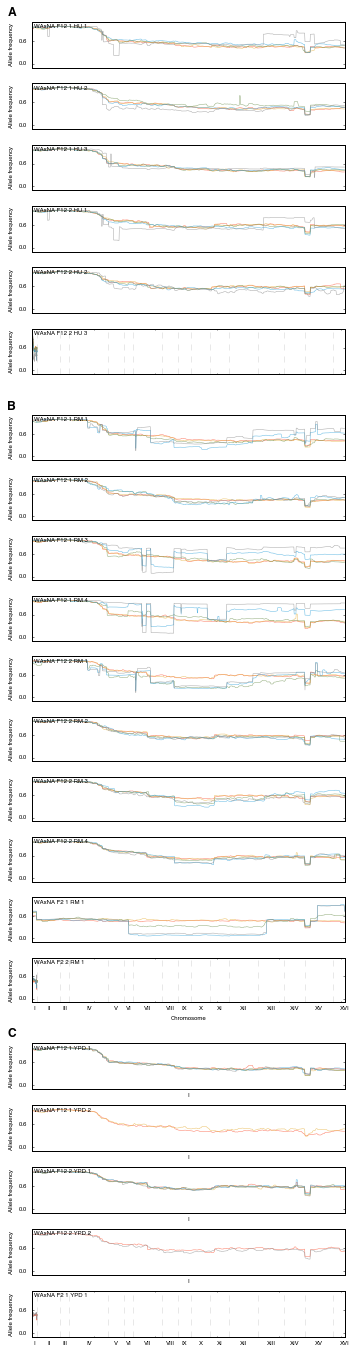

In [4]:
dict_panels = {
    'WAxNA_F2_1_YPD_1':(0,0),
    'WAxNA_F12_1_YPD_1':(1,0), 
    'WAxNA_F12_1_YPD_2':(2,0), 
    'WAxNA_F12_2_YPD_1':(3,0), 
    'WAxNA_F12_2_YPD_2':(4,0),
    'WAxNA_F12_1_HU_1':(5,0), 
    'WAxNA_F12_1_HU_2':(6,0), 
    'WAxNA_F12_1_HU_3':(7,0), 
    'WAxNA_F12_2_HU_1':(8,0), 
    'WAxNA_F12_2_HU_2':(9,0), 
    'WAxNA_F12_2_HU_3':(10,0),
    'WAxNA_F2_1_RM_1':(0,1),
    'WAxNA_F2_2_RM_1':(1,1),
    'WAxNA_F12_1_RM_1':(2,1), 
    'WAxNA_F12_1_RM_2':(3,1), 
    'WAxNA_F12_1_RM_3':(4,1), 
    'WAxNA_F12_1_RM_4':(5,1),
    'WAxNA_F12_2_RM_1':(6,1), 
    'WAxNA_F12_2_RM_2':(7,1), 
    'WAxNA_F12_2_RM_3':(8,1), 
    'WAxNA_F12_2_RM_4':(9,1)
}

# get a figure with a lot of subplots
fig = plt.figure(figsize=(5, 22), dpi=300)

indexer = [slice(None)]*len(freq_df.index.names)
indexer[freq_df.index.names.index('sample')] = ['WAxNA_F12_1_YPD_1','WAxNA_F12_1_YPD_2','WAxNA_F12_1_HU_3','WAxNA_F12_1_RM_1']
gl = freq_df.loc[tuple(indexer),:].dropna(axis=1, how='all')

shape = pd.DataFrame({k: 
x.shape for k,x in freq_df.unstack('time').groupby(level=['selection'])
})

ygrid = shape.ix[0].values#gl.index.get_level_values('sample').unique()#shape.ix[0].values
grid = gridspec.GridSpec(len(ygrid), 1, height_ratios=ygrid, hspace=0.1)#, hspace=0.7)len(ygrid)
# grid = gridspec.GridSpec(3, 1, hspace=0.2)

gs = {}

for ii, (e, sdf) in enumerate(freq_df.groupby(level='selection')):
    
    idx = 0
    
    nrows = len(sdf.index.get_level_values('sample').unique())#ygrid[ii]
    ncols = 1
    gs[e] = gridspec.GridSpecFromSubplotSpec(nrows, ncols,
                                             subplot_spec=grid[ii],#dict_panels[p]],
                                             hspace=0.35)

    for (jj, (p, pdf)) in enumerate(sdf.groupby(level='sample')):
        
#         ax = plt.subplot(gs[e][jj])#idx:idx+len(pdf)])
        
        # retrieve axes
        if jj==0:
            ax = plt.subplot(gs[e][jj])#gs[idx:idx+len(pdf)])
        else:
            ax = plt.subplot(gs[e][jj], sharex=ax)#gs[idx:idx+len(pdf)], sharex=ax)
            
        idx += len(pdf)
        
#         # retrieve axes
#         if (dict_panels[p]==(0,0))|(dict_panels[p]==(0,1)):
#             ax = plt.subplot(gs[:])
# #             ax = plt.subplot(gs[(e,p)][idx:idx+len(gc)])
#         else:
#             ax = plt.subplot(gs[:], sharex=ax)
#             ax = plt.subplot(gs[(e,p)][idx:idx+len(gc)])

        colors = [dict_time['color'][k] for k in pdf.index.get_level_values('time')]
        pdf.loc[:,1].T.plot(ax=ax, color=colors, 
                            alpha=0.75, lw=0.5, 
                            legend=False, zorder=2)
    
        ax.set_ylim((-.1, 1.1))
        ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
    
        xstart, xend, xlabels = plot.set_custom_labels(pdf.columns, 1)

#         for i in (set(xstart) & set(xend)):
#             if utils.roman_to_int(i) % 2 == 1:
#                 ax.axvspan(xstart[i], xend[i], color='0.9', lw=0, zorder=1) 
        # labels
        if ax.is_last_row():
            ax.set_xticks(xlabels.values())
            ax.set_xticklabels(xlabels.keys())
            ax.set_xlabel('Chromosome')
        else:
            ax.set_xticks([])
            ax.set_xticklabels([])
        # grid
        xgrid=[xst+1. for xst in list(set(xstart.values()))]
        [ax.axvline(x, lw=0.5, ls="--", color="lightgray") for x in xgrid]

    
#     for s,e in zip(sgd_length.chr_start, sgd_length.chr_end):
#     for chrom, g in sgd_length.groupby('chr_arabic'):
#         if chrom % 2 == 1:
#             print chrom, chrom % 2
#             ax2.axvspan(g.chr_start.squeeze(), g.chr_end.squeeze(), color='0.9', lw=0) 
    
#         ax.set_title(p.replace('_',' '), fontsize=6, loc='center')
        ax.set_ylabel('Allele frequency')    
        
        ax.annotate(p.replace('_',' '),
                    xy=(0.025, 0.9), xycoords=ax.transAxes, fontsize=6,
                    color='k', ha='left', va='center',
                    xytext=(-5,0), textcoords='offset points')


        
    # set panel labels
    ax = plt.subplot(gs[e][0])
    ax.text(-0.05, 1.2, chr(ii + ord('A')), transform=ax.transAxes,
            fontsize=12, fontweight='bold', va='center', ha='right')
#     ax.text(0, 1.2, dict_environment['short_label'][e], transform=ax.transAxes,
#             fontsize=8, va='center', ha='left')

# ax1 = plt.subplot(gs['RM','WAxNA_F12_1_RM_1_T32'][(0,0)])
# ax1.text(-0.05, 3,  chr(ord('B')), transform=ax1.transAxes,
#          fontsize=12, fontweight='bold', va='center', ha='right')
# ax1.text(0, 3,  dict_environment['short_label']['RM'], transform=ax1.transAxes,
#          fontsize=8, va='center', ha='left')
        
# axes limits
for ax in fig.get_axes():
    ax.xaxis.label.set_size(6)
    ax.yaxis.label.set_size(6)
    ax.tick_params(axis='both', which='major', size=2, labelsize=6)
    ax.tick_params(axis='both', which='minor', size=1, labelsize=4)
    
    # turn off the x-axis ticks
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

fig.savefig(dir_supp+'figures/figureSX_allele_freqs/figureSX_allele_freqs.png', dpi=300, bbox_inches='tight')
fig.savefig(dir_supp+'figures/figureSX_allele_freqs/figureSX_allele_freqs.svg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# pdf.T.plot(kind='line', legend=False)#['sample']
#     nrows = 10
#     ncols = 1
#     gs[e] = gridspec.GridSpecFromSubplotSpec(nrows, ncols,
#                                              subplot_spec=grid[ii],
#                                              hspace=0.35)
# for ii, ((e,p), sdf) in enumerate(freq_df.groupby(level='selection')):
    
#     idx = 0
    
#     nrows = 1#ygrid[ii]
#     ncols = 1
#     gs[(e,p)] = gridspec.GridSpecFromSubplotSpec(nrows, ncols,
#                                                  subplot_spec=grid[:,ii])
        
#     ax = plt.subplot(gs[(e,p)][idx:idx+len(sdf)])

#     ax.text(-0.15, 1.25,  chr(ord('A')), transform=ax.transAxes,
#             fontsize=12, fontweight='bold', va='top', ha='right')


# groups = freq_df.groupby(level='sample', sort=False)

# for ii, (sample, group) in enumerate(groups):
        
#     ax3 = axes[(1,ii)]